Data Cleaning and Prep Work

Data from: 

Antonio, Nuno, Ana de Almeida, and Luis Nunes. “Hotel Booking Demand Datasets.” Data in Brief 22 (February 1, 2019): 41–49. https://doi.org/10.1016/j.dib.2018.11.126.



UNLV MIS 761 - Final Project

Load Basic Data Package

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pyreadstat


In [7]:
data = pd.read_csv('hotel_bookings_org.csv')
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [8]:
data.tail(5) 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [9]:
# Checking the data type
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

General Size of data

In [10]:
data.shape

(119390, 32)

Lets check for duplicates - then nulls

In [11]:
# duplicate_rows_df = data[data.duplicated()]
# print(' number of duplicate rows:',  duplicate_rows_df.shape)


This data doesn't contain Unique ids - ~32,000 duplicate row 

Lets count all the values per column - this will tell us if we are missing data.

In [12]:
data.count()


hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

3 columns are missing data

country                           118902

agent                             103050

company                             6797

Before we try to fix or adjust that missing column - lets look for nulls

In [13]:
print(data.isnull().sum())


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Ohh - neat find -

So the same 3 columns have a number of nulls

country                              488

agent                              16340

company                           112593



lets remove the nulls - since they are in the same 3 columns

In [14]:
# Who is the fuck you fuck you babydata2 = data.dropna() 
data2 = data 

# data2.count()
data2.shape


(119390, 32)

lets recheck the nulls


In [15]:
# print(data2.isnull().sum()) ## should come up as zero

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


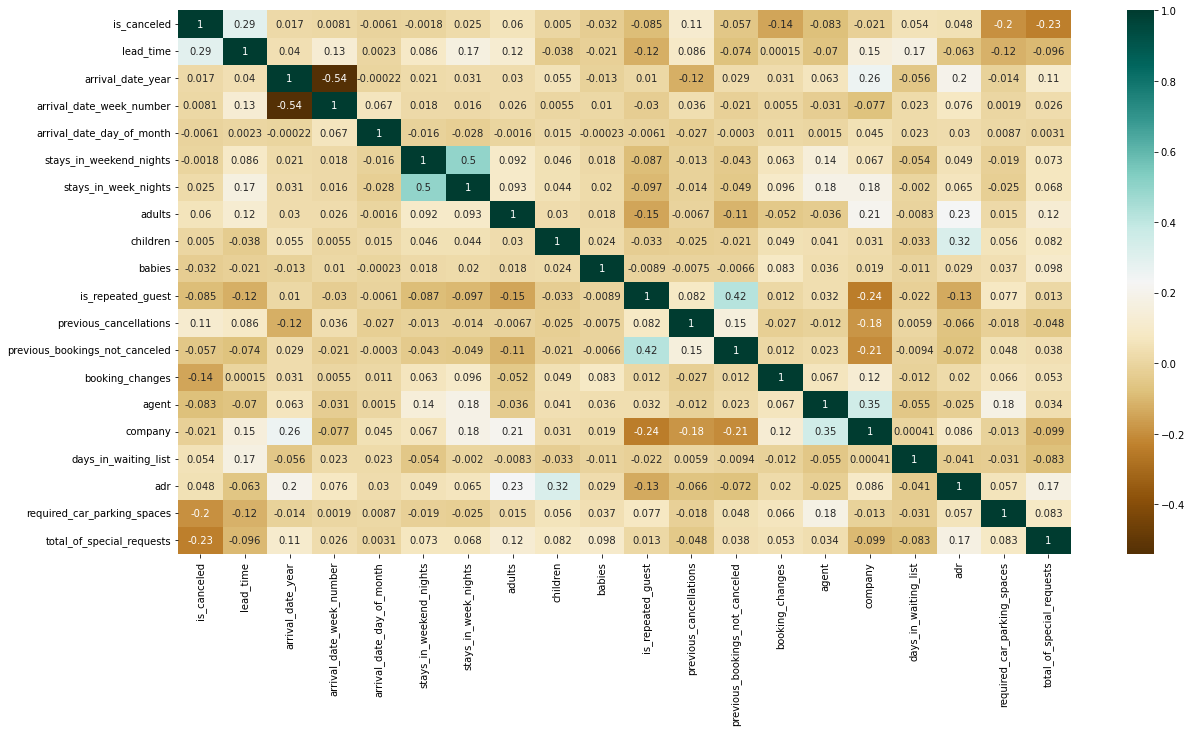

In [16]:
plt.figure(figsize=(20,10))
c= data2.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

### CLEAN UP TIME :-)

If agency is blank then booking was most likely made without an agency

Same as company; if blank then itt was most likely private.

# rest schould be self-explanatory.


In [17]:
nan_replacements = {"children:": 0.0,"country": "Unknown", "agent": 0, "company": 0}
data3 = data2.fillna(nan_replacements)


 "meal" contains values "Undefined", which is equal to SC.

In [18]:
data3["meal"].replace("Undefined", "SC", inplace=True)

Some strange have no adults, children, or babies - clean that up

In [19]:
missing_guests = list(data3.loc[data3["adults"] + data3["children"] + data3["babies"]==0].index)
data3.drop(data3.index[missing_guests], inplace=True)

old: (119390, 32)

after light cleaning ((119210, 32))

In [20]:
data3.shape

(119210, 32)

Lets look a bit more. 

In [21]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119210.0,0.370766,0.483012,0.00,0.0,0.00,1.0,1.0
lead_time,119210.0,104.109227,106.875450,0.00,18.0,69.00,161.0,737.0
arrival_date_year,119210.0,2016.156472,0.707485,2015.00,2016.0,2016.00,2017.0,2017.0
arrival_date_week_number,119210.0,27.163376,13.601107,1.00,16.0,28.00,38.0,53.0
arrival_date_day_of_month,119210.0,15.798717,8.781070,1.00,8.0,16.00,23.0,31.0
stays_in_weekend_nights,119210.0,0.927053,0.995117,0.00,0.0,1.00,2.0,19.0
stays_in_week_nights,119210.0,2.499195,1.897106,0.00,1.0,2.00,3.0,50.0
adults,119210.0,1.859206,0.575186,0.00,2.0,2.00,2.0,55.0
children,119206.0,0.104047,0.398842,0.00,0.0,0.00,0.0,10.0
babies,119210.0,0.007961,0.097509,0.00,0.0,0.00,0.0,10.0


Possible (but not sure) Outlier
8 parking spaces required?
adr of 54000 when 50% is 95
lead time (2 years?)
10 babies or childern ? human traffic going on?
also 55 adults in a room? (not sure I want to know what is going on)



In [22]:
data3.describe(include = "object").T

,count,unique,top,freq
hotel,119210,2,City Hotel,79163
arrival_date_month,119210,12,August,13861
meal,119210,4,BB,92236
country,119210,178,PRT,48483
market_segment,119210,8,Online TA,56408
distribution_channel,119210,5,TA/TO,97750
reserved_room_type,119210,9,A,85873
assigned_room_type,119210,11,A,74020
deposit_type,119210,3,No Deposit,104461
customer_type,119210,4,Transient,89476


In [23]:
data3["children"] = data3["children"].fillna(0)
data3["country"] = data3["country"].fillna("Undefined")
data3["agent"] = data3["agent"].fillna(0)
data3["company"] = data3["company"].fillna(0)

In [24]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119210.0,0.370766,0.483012,0.00,0.0,0.00,1.0,1.0
lead_time,119210.0,104.109227,106.875450,0.00,18.0,69.00,161.0,737.0
arrival_date_year,119210.0,2016.156472,0.707485,2015.00,2016.0,2016.00,2017.0,2017.0
arrival_date_week_number,119210.0,27.163376,13.601107,1.00,16.0,28.00,38.0,53.0
arrival_date_day_of_month,119210.0,15.798717,8.781070,1.00,8.0,16.00,23.0,31.0
stays_in_weekend_nights,119210.0,0.927053,0.995117,0.00,0.0,1.00,2.0,19.0
stays_in_week_nights,119210.0,2.499195,1.897106,0.00,1.0,2.00,3.0,50.0
adults,119210.0,1.859206,0.575186,0.00,2.0,2.00,2.0,55.0
children,119210.0,0.104043,0.398836,0.00,0.0,0.00,0.0,10.0
babies,119210.0,0.007961,0.097509,0.00,0.0,0.00,0.0,10.0


undo one / zero encoding ( IBM SPSS can - redo this is needed)

In [25]:
data3["is_canceled"] = data3["is_canceled"].replace({1:"Yes", 0:"No"})
data3["is_repeated_guest"] = data3["is_repeated_guest"].replace({1:"Yes", 0:"No"})
print(data3.is_canceled.unique())
print(data3.is_repeated_guest.unique())

['No' 'Yes']
['No' 'Yes']


change type type

In [26]:
data3['reservation_status_date'] = pd.to_datetime(data3['reservation_status_date'])

the date time is funky - it is broken down by year - month - day in different columns - just going to make a new column with on date

In [27]:
data3['arrv_date'] = pd.to_datetime(data3.arrival_date_year.astype(str) + '-' + data3.arrival_date_month.astype(str) + '-' + data3.arrival_date_day_of_month.astype(str))

In [28]:
data3['arrv_date'] 

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrv_date, Length: 119210, dtype: datetime64[ns]

In [29]:
data3.shape
print( data2['children'].isnull().sum())


4


In [30]:
# this will replace any missing values with the mean of the column
data3['children'].fillna(value= data3['children'].mean(), inplace=True)
data3['children'] = data3['children'].apply(np.floor)

In [31]:
print( data2['children'].isnull().sum())
print( data3['children'].isnull().sum())

4
0


In [32]:
np.sum(data3.isnull())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

DF to CSV
https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file

In [33]:
data3.to_csv('hotel_cleaned.csv', sep='\t', encoding='utf-8')

output to sav
https://www.marsja.se/how-to-read-write-spss-files-in-python-pandas/


In [34]:
pyreadstat.write_sav(data3, "hotel_cleaned.sav", file_label="Hotel Data Set")


In [35]:
data3.to_excel('hotel_cleaned.xlsx')

In [41]:
# mask2 = (data3['is_canceled'] >= 3) 

TypeError: '>=' not supported between instances of 'str' and 'int'

In [42]:
per = data3.groupby(['company','is_canceled']).size()

In [40]:
per.to_excel('cancelled_by_company.xlsx')